In [1]:
!pip install scikit-learn
!pip install scipy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import LinearRegression

<h1>Prepare Data</h1>

In [3]:
df = pd.read_csv("../dataset/mental_health_dataset.csv")

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [7]:
df.drop(['Person ID', 'Blood Pressure', 'Heart Rate', 'Daily Steps'],axis=1,inplace=True)

In [8]:
df.columns = ['gender', 'age', 'occupation', 'sleep_duration', 'sleep_quality', 'physical_activity', 'stress_level', 'bmi', 'sleep_disorder']

<h1>Analyze Data</h1>

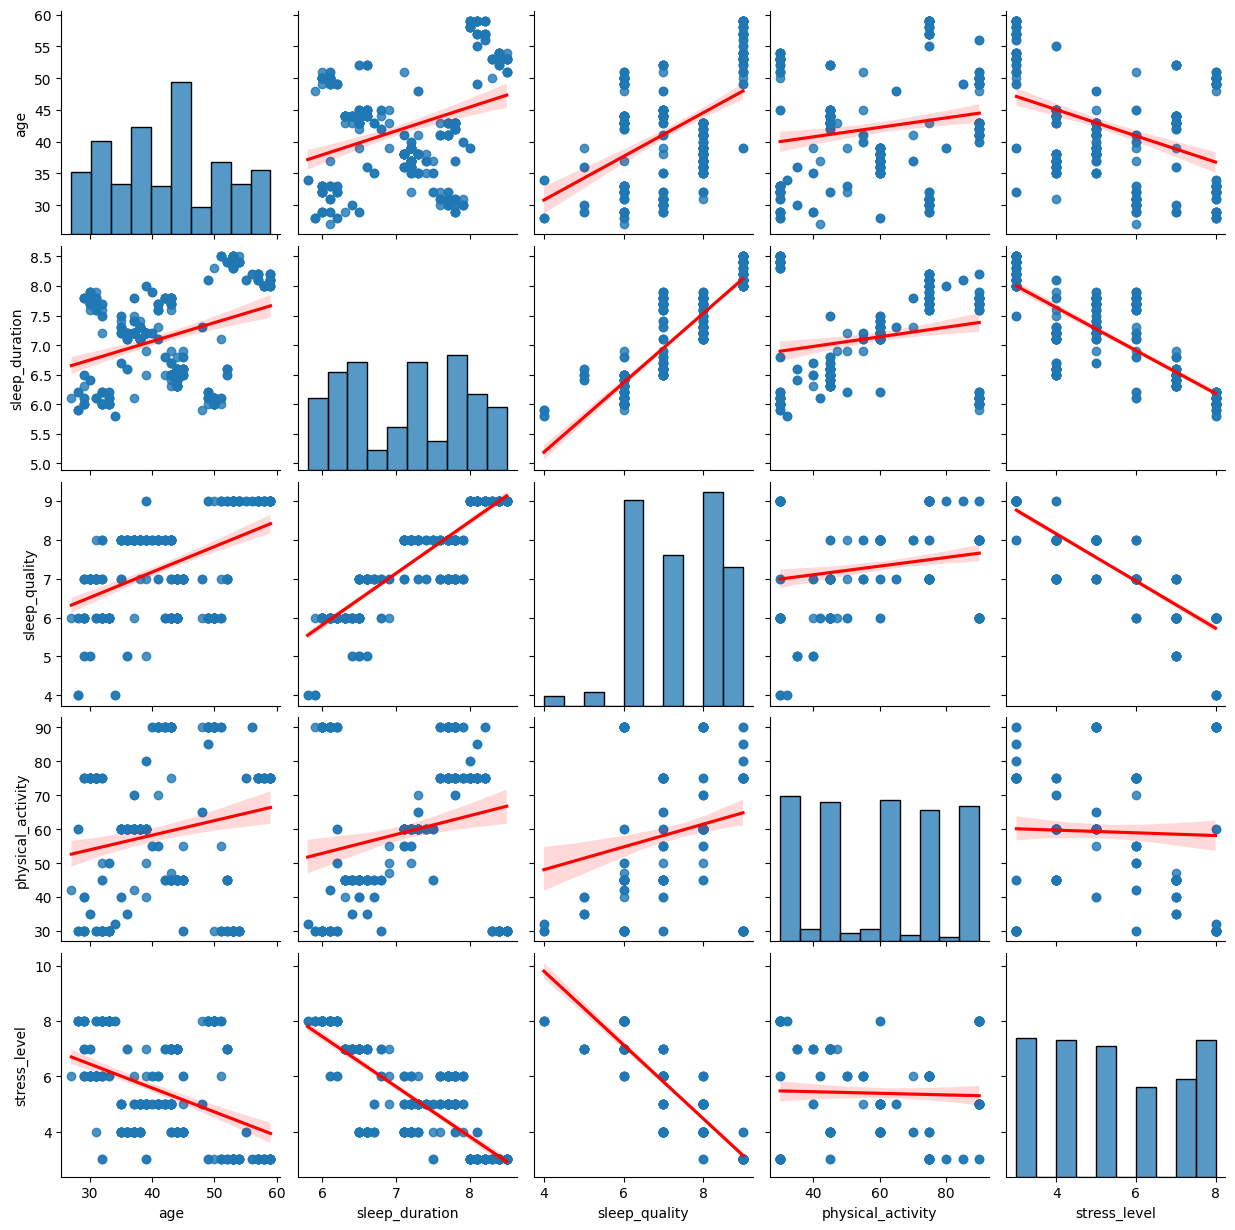

In [9]:
sns.pairplot(df, kind='reg', plot_kws={'line_kws': {'color': 'red'}})

Key:

* With bigger age people tend to have better sleep, which helps reduce stress.
* We can see correlation between sleep duration and sleep quality. One affects another

C:\Users\Admin\AppData\Local\Temp\ipykernel_12584\2173163129.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(counts.index, rotation=45, ha='right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12584\2173163129.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(counts.index, rotation=45, ha='right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12584\2173163129.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(counts.index, rotation=45, ha='right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12584\2173163129.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


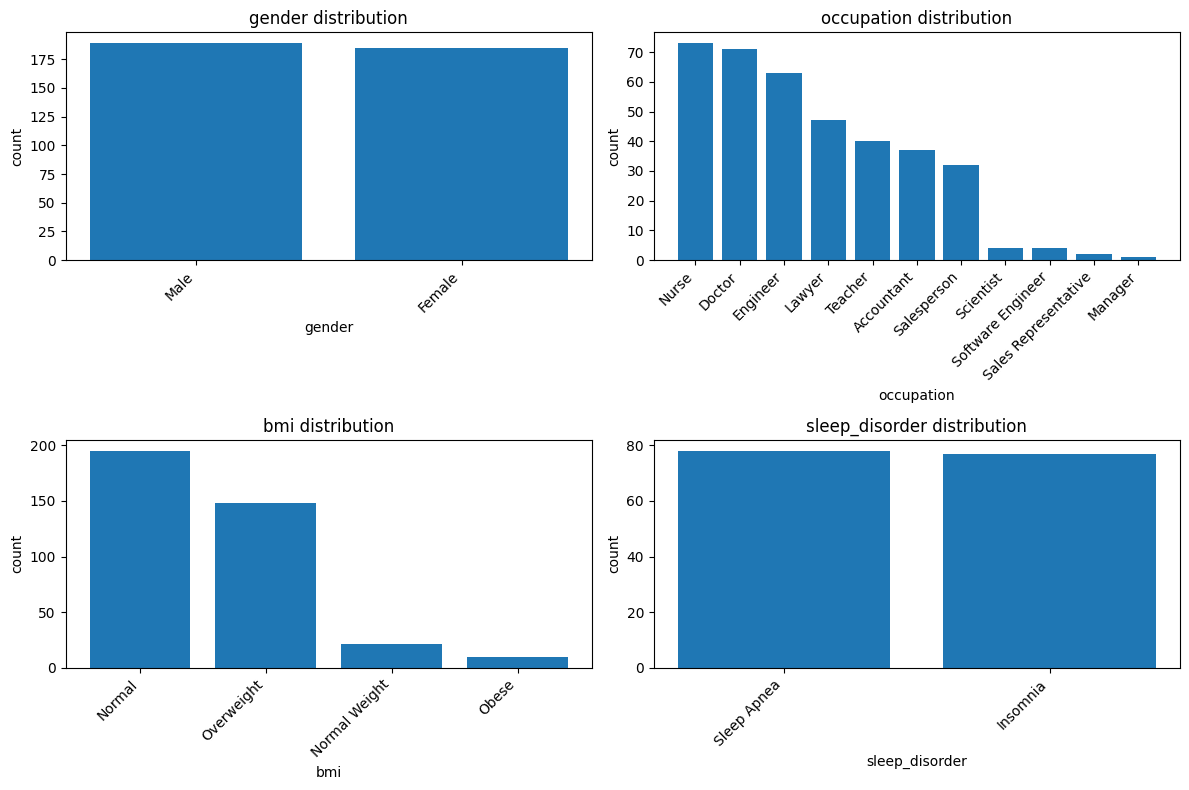

In [10]:
categories = ['gender', 'occupation', 'bmi', 'sleep_disorder']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, category in enumerate(categories):
    row = i // 2
    col = i % 2

    counts = df[category].value_counts()
    
    axes[row, col].bar(counts.index, counts)
    axes[row, col].set_title(f'{category} distribution')
    axes[row, col].set_xlabel(category)
    axes[row, col].set_ylabel('count')
    
    axes[row, col].set_xticklabels(counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Key:

* Significant amount of interviewed have overweight
* Third of the interviewed have trouble or lack of sleep



C:\Users\Admin\AppData\Local\Temp\ipykernel_12584\2555387465.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='sleep_quality',  palette=['#0000FF', '#FF0000'])


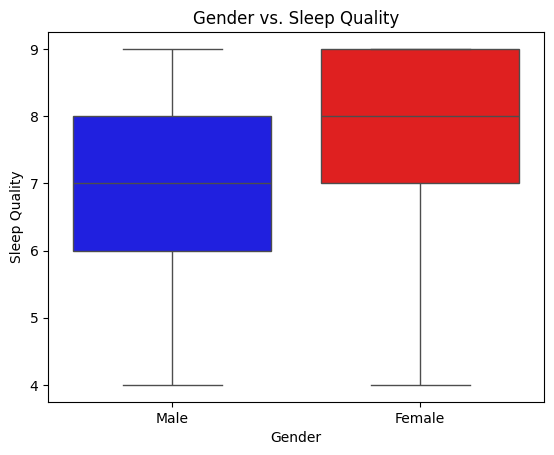

In [11]:
sns.boxplot(data=df, x='gender', y='sleep_quality',  palette=['#0000FF', '#FF0000'])

plt.xlabel('Gender')
plt.ylabel('Sleep Quality')
plt.title('Gender vs. Sleep Quality')

plt.show()

Key:

* Females have better sleep quality than males, which could be reason why women are less stressed

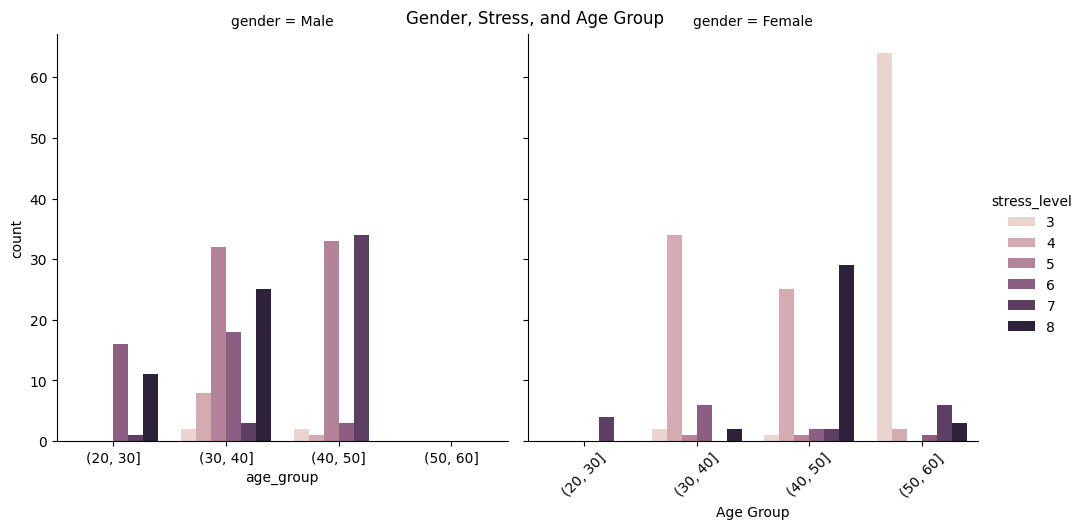

In [12]:
age_groups = [20, 30, 40, 50, 60]
df['age_group'] = pd.cut(df['age'], bins=age_groups)

sns.catplot(data=df, x='age_group', hue='stress_level', col='gender', kind='count')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.suptitle('Gender, Stress, and Age Group')
plt.xticks(rotation=45)
plt.show()

Key:

Males

* Men en their 20s feel under a lot of stress
* In their 30s dispersion of stress level is wider
* In their 40s they are pretty equal between normal and high level of stress

Females

* young women also feel under stress
* Much easier at their 30s
* Strong dividness between easiness and very high stress in their 40s
* Significally less stressed in their 50s

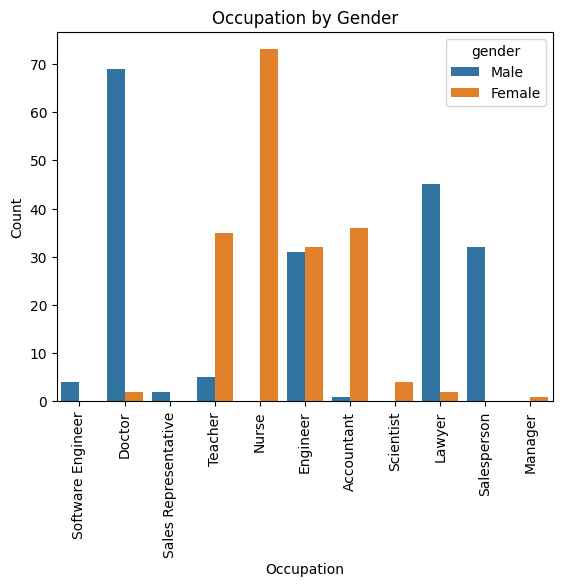

In [13]:
sns.countplot(data=df, x='occupation', hue='gender')

plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation by Gender')
plt.xticks(rotation=90)
plt.show()

Key:

* All salespersons and sales representatives are men
* Almost all doctors and lawyers are men
* All scientists are women


* Doctors, Salespersons, Scientists and Sales Representatives feel more stressed
* Nurses divided by 2 experience: their job very stressful or not stressful at all
* Lawyers are somewhere in the middle. Their job is not that intense
* Teachers and Accountants and Engineers are feel less stressful


Hense, the most stressful jobs are mostly taken by men. 

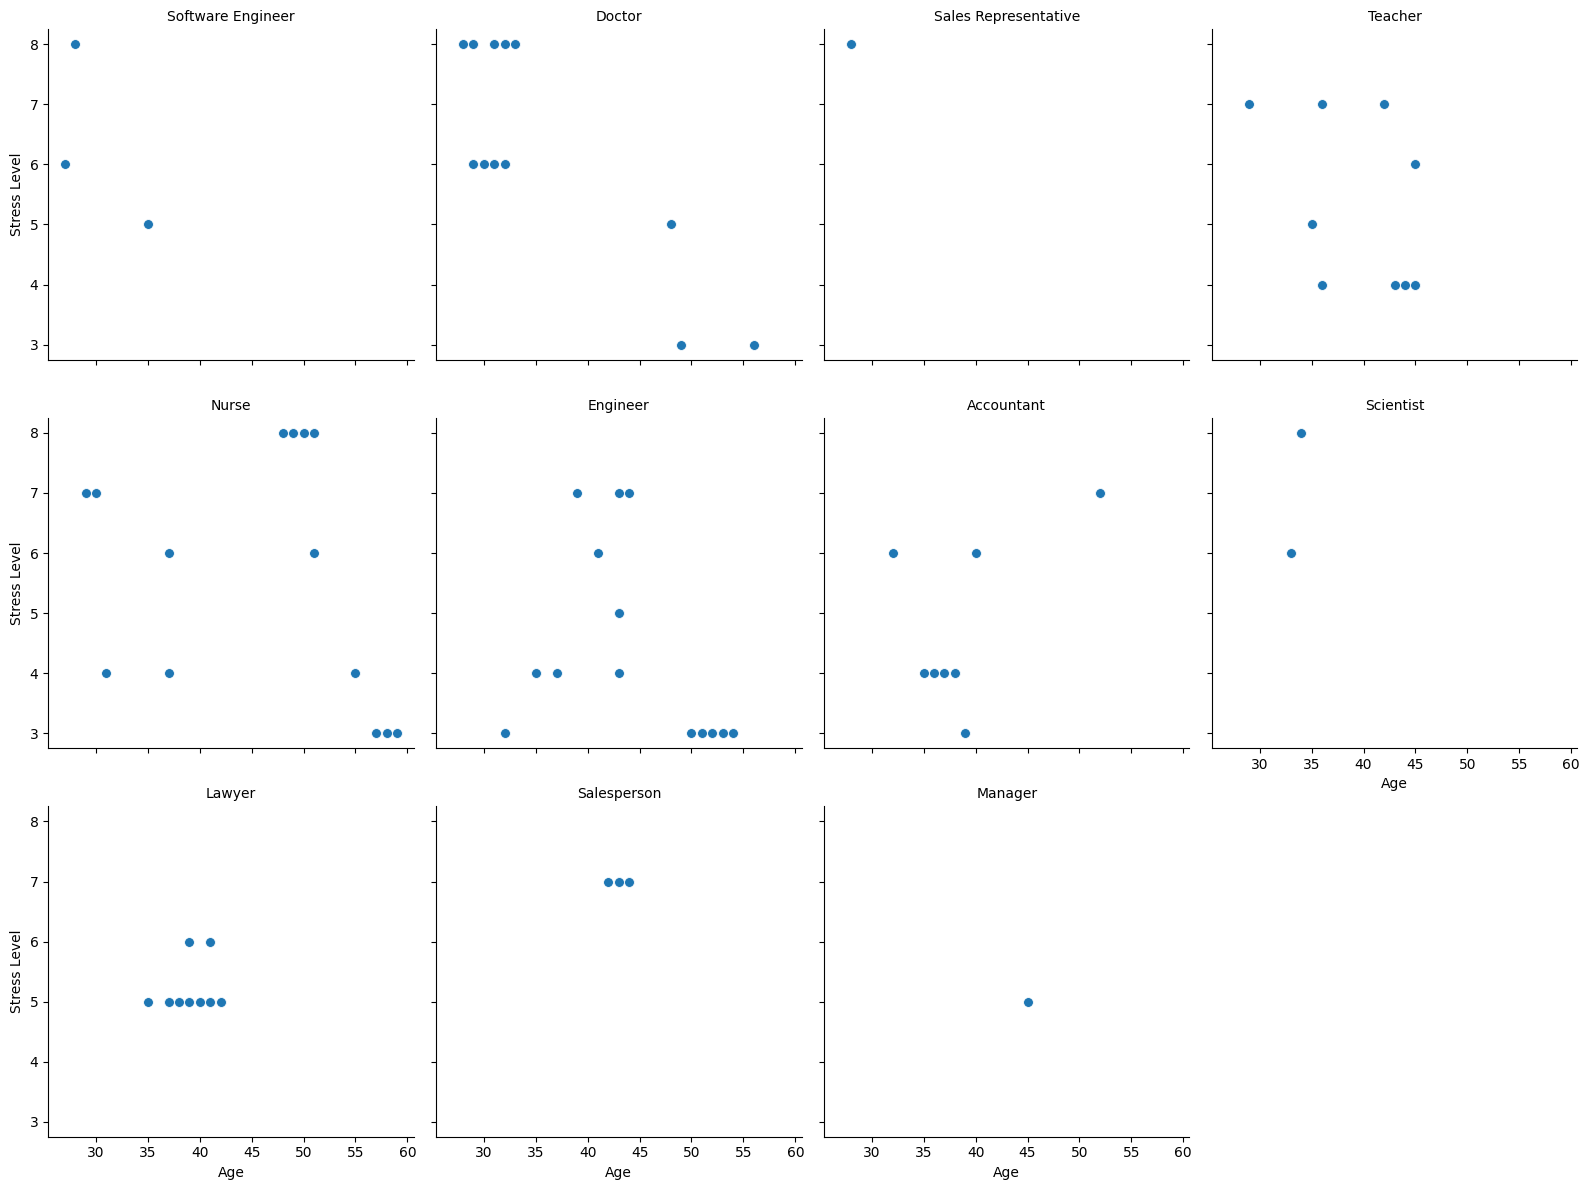

In [14]:
grid = sns.FacetGrid(data=df, col='occupation', col_wrap=4, height=4)
grid.map(sns.scatterplot, 'age', 'stress_level', s=50)

grid.set_axis_labels('Age', 'Stress Level')
grid.set_titles(col_template="{col_name}")

grid.tight_layout()
plt.show()

Key:

* With age doctors, teachers and engineers are less stressed
* Accountants are more stressed with age
* Nurses have different distribution, going down with age, raising at pick near 50 years and then significally go down. 